# Script to perform some basic data exploration

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
path_to_dataset = "/home/shagun/FortKnox/Quora/quora_duplicate_questions.tsv"

In [3]:
# Load the dataset into a pandas dataframe
df = pd.read_csv(path_to_dataset, delimiter="\t")
print("Total number of question pairs = ", str(len(df)))

Total number of question pairs =  404290


In [4]:
# Let us look at a sample of the dataset
df_sample = df.sample(5)
df_sample

,id,qid1,qid2,question1,question2,is_duplicate
172844,172844,266784,43715,How can I setup an ffserver on Windows 8.1?,I purchased a new laptop and it has DOS operat...,0
8167,8167,9541,15929,Is it possible to retrieve an old conversation...,How can I meet people on Kik Messenger?,0
212909,212909,318090,318091,Which are some of the best management books fo...,What are the best books for a new manager to r...,0
139744,139744,222223,222224,"What is it like to work at ThoughtWorks, İstan...",What's it like to work at ThoughtWorks?,0
403611,403611,207587,231395,Could our universe actually be a computer prog...,Is our universe just a computer simulation?,1


In [5]:
# And some basic statistics
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
print("Around", str(round(df.describe()['is_duplicate']['mean']*100)), "% of the question pairs are duplicates.")

Around 37.0 % of the question pairs are duplicates.


## Let us dive deep into the data

In [7]:
sample_data = df.sample(10)

In [8]:
labels = list(sample_data['is_duplicate'].apply(lambda x: int(x)).values)
labels = np.asarray(labels)

In [9]:
labels

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [10]:
first_question_list = list(sample_data['question1'].apply(lambda x: str(x)).values)
second_question_list = list(sample_data['question2'].apply(lambda x: str(x)).values)
question_list = list(zip(first_question_list, second_question_list))

In [11]:
print("Question1: ",question_list[0][0])
print("Question2: ",question_list[0][1])
print("Label: ", str(labels[0]))


Question1:  What are some of the best books about deep learning for a beginner?
Question2:  What are the best books about deep learning?
Label:  1


In [12]:
uniq_words_counter = Counter()
for question_tuple in question_list:
    for question in question_tuple:
        if(isinstance(question, str)):
            for word in question.split():
#                 print(word)
                uniq_words_counter.update([word])
uniq_words_count = str(len(uniq_words_counter))
print("Unique words in the dataset: "+ uniq_words_count)

Unique words in the dataset: 133


## Let us compute the question statistics

In [13]:
# Create a list of all the question pairs
first_question_list = list(df['question1'].apply(lambda x: str(x)).values)
second_question_list = list(df['question2'].apply(lambda x: str(x)).values)
question_list = list(zip(first_question_list, second_question_list))

In [14]:
print(len(question_list))

404290


In [15]:
uniq_words_counter = Counter()
for question_tuple in question_list:
    for question in question_tuple:
        if(isinstance(question, str)):
            for word in question.split():
                uniq_words_counter.update([word])
uniq_words_count = str(len(uniq_words_counter.items()))
print("Unique words in the dataset: "+ uniq_words_count)

Unique words in the dataset: 232534


In [16]:
question_list[0]

('What is the step by step guide to invest in share market in india?',
 'What is the step by step guide to invest in share market?')

In [17]:
'india?' in uniq_words_counter

True

In [18]:
question_length_list = []
for question_tuple in question_list:
    for question in question_tuple:
        question_length_list.append(len(question.split()))
question_length_list = np.asarray(question_length_list)

In [19]:
print("Average question length: ", str(np.average(question_length_list)))

print("\n")

print("Median question length: ", str(np.median(question_length_list)))

print("\n")

print("Min question length: ", str(np.min(question_length_list)))

print("\n")

arg_min = int(np.argmin(question_length_list)/2)

print("Shortest question: ", question_list[arg_min])
# print("Label: ", df['is_duplicate'][arg_min])

print("\n")

print("Max question length: ", str(np.max(question_length_list)))
arg_max = int(np.argmax(question_length_list)/2)

print("\n")

print("Longest question: ", question_list[arg_max])

Average question length:  11.0621002251


Median question length:  10.0


Min question length:  1


Shortest question:  ('.', "Why is Cornell's endowment the lowest in the Ivy League?")


Max question length:  237


Longest question:  ("Im moving to NY. My Dr gave me 2 refills of Xanax, but pharmacy said by law, they couldn't give me more than 1 refill per month. Is it true?", "Heartbreak? Heartbreak? She's my girlfriend for two months, I chose her over my girlfriend for 2 years. I like her so much to the point that I can't let her go even if she wants to end our relationship because of the other people around us most especially her family. I do the things for her that I'm not used to for a girl and I am willing to sacrifice everything just to have a little time with her. A little and limited time that I'm asking from her but she don't wanna give it to me. She's scared that someone might see us, that she's still having an affair with me. I love her and I want to be with her at least on

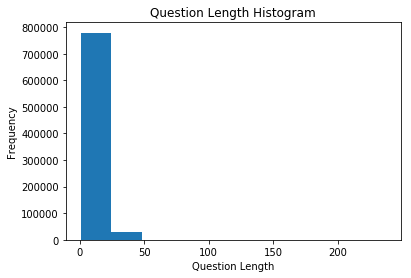

In [20]:
import matplotlib.pyplot as plt
from numpy.random import normal
# gaussian_numbers = normal(size=1000)
plt.hist(question_length_list)
plt.title("Question Length Histogram")
plt.xlabel("Question Length")
plt.ylabel("Frequency")
plt.show()

### It should be sufficient to pad our questions to a maximum length of 50